In [1]:
###Web scrapping###

import requests
import pandas as pd

In [2]:
url = "https://www.worldometers.info/coronavirus/#countries"

In [3]:
html = requests.get(url).content

In [5]:
df_list = pd.read_html(html)

In [8]:
df = df_list[-1]

In [13]:
df.to_csv('covid.csv', index=False)

# EDA

In [14]:
df_covid = pd.read_csv('covid.csv')

In [11]:
import matplotlib.pyplot as plt

In [15]:
df_covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Tot Deaths/1M pop
0,China,81285,+67,3287.0,6.0,74051.0,3947,1235.0,56.0,2.0
1,USA,85435,"+17,224",1295.0,268.0,1868.0,82272,2122.0,258.0,4.0
2,Italy,80589,"+6,203",8215.0,712.0,10361.0,62013,3612.0,1333.0,136.0
3,Spain,57786,"+8,271",4365.0,718.0,7015.0,46406,3166.0,1236.0,93.0
4,Germany,43938,"+6,615",267.0,61.0,5673.0,37998,23.0,524.0,3.0


In [17]:
df_covid.shape

(201, 10)

In [20]:
df_covid.rename(columns = {'Country,Other':'Country',
                          'Serious,Critical':'Critical'
                          },inplace = True)

In [21]:
df_covid.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Tot Deaths/1M pop
0,China,81285,+67,3287.0,6.0,74051.0,3947,1235.0,56.0,2.0
1,USA,85435,"+17,224",1295.0,268.0,1868.0,82272,2122.0,258.0,4.0
2,Italy,80589,"+6,203",8215.0,712.0,10361.0,62013,3612.0,1333.0,136.0
3,Spain,57786,"+8,271",4365.0,718.0,7015.0,46406,3166.0,1236.0,93.0
4,Germany,43938,"+6,615",267.0,61.0,5673.0,37998,23.0,524.0,3.0


Total number of countries 

In [26]:
df_covid.Country.count()

201

Total cases all over the world

In [27]:
df_covid.TotalCases.sum()

1063620

Total recover cases all over the world

In [29]:
df_covid.TotalRecovered.sum()

246810.0

Total deaths all over world

In [28]:
df_covid.TotalDeaths.sum()

48136.0

# COUNTRY VS TOTALDEATH

In [61]:
death = df_covid.sort_values(by = 'TotalDeaths', ascending = False).head(30).iloc[1:]

In [62]:
death.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Tot Deaths/1M pop
2,Italy,80589,"+6,203",8215.0,712.0,10361.0,62013,3612.0,1333.0,136.0
3,Spain,57786,"+8,271",4365.0,718.0,7015.0,46406,3166.0,1236.0,93.0
0,China,81285,+67,3287.0,6.0,74051.0,3947,1235.0,56.0,2.0
5,Iran,29406,"+2,389",2234.0,157.0,10457.0,16715,2746.0,350.0,27.0
6,France,29155,"+3,922",1696.0,365.0,4948.0,22511,3375.0,447.0,26.0


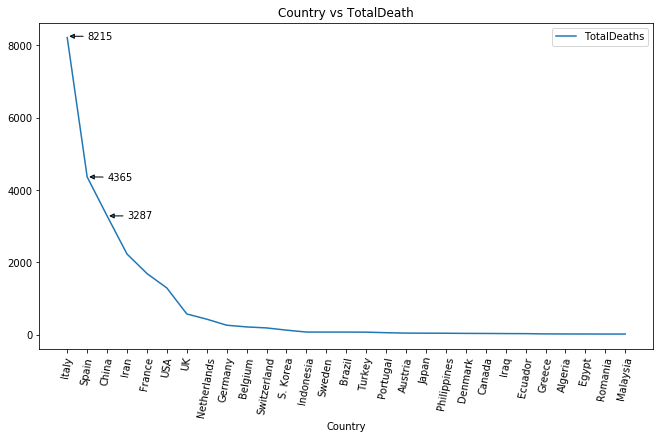

In [90]:
plt.figure(figsize=(11,6))
plt.plot(death['Country'],death['TotalDeaths'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalDeath')
plt.annotate(8215, 
             xy=('Italy', 8250),
             xytext = ('Spain',8250),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(4365, 
             xy=('Spain', 4365),
             xytext = ('China', 4356),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(3287, 
             xy=('China', 3287),
             xytext = ('Iran', 3287),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALCASES

In [91]:
case = df_covid.sort_values(by = 'TotalCases', ascending = False).head(30).iloc[1:]

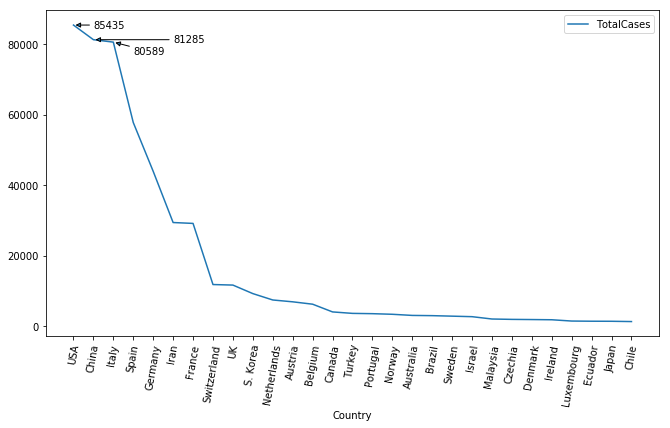

In [96]:
plt.figure(figsize=(11,6))
plt.plot(case['Country'],case['TotalCases'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.annotate(80589, 
             xy=('Italy', 80589),
             xytext = ('Spain',78000),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(85435, 
             xy=('USA', 85435),
             xytext = ('China', 85435),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(81285, 
             xy=('China', 81285),
             xytext = ('Iran', 81285),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALRECOVERED

In [97]:
recover = df_covid.sort_values(by = 'TotalRecovered', ascending = False).head(30).iloc[1:]

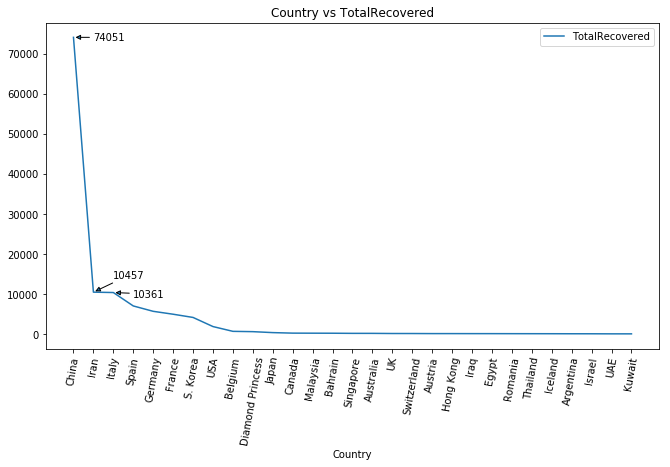

In [109]:
plt.figure(figsize=(11,6))
plt.plot(recover['Country'],recover['TotalRecovered'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalRecovered')
plt.annotate(10457, 
             xy=('Iran', 10457),
             xytext = ('Italy',14700),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(10361, 
             xy=('Italy', 10361),
             xytext = ('Spain', 10000),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(74051, 
             xy=('China', 74051),
             xytext = ('Iran', 74051),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()